In [81]:
import pandas as pd
col_names = ['scores', 'hours']
df = pd.read_csv('https://raw.githubusercontent.com/llSourcell/Intro_to_the_Math_of_intelligence/master/data.csv', header = None)
df.head()

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [9]:
from numpy import *

def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m*x + b)) ** 2
        return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    # gradient descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]
        
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b,m]

def run():
    points = genfromtxt('data.csv', delimiter = ',')
    #hyperparameters
    learning_rate = 0.0001
    # y = mx + b
    initial_b = 0 # y-intercept
    initial_m = 0 # slope of the equation
    num_iterations = 1000
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    
if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 10.053342197544191
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 2.693563420287152


In [60]:
import numpy as np
X = np.array(df[0])
y = np.array(df[1])

X # Cycling distance

array([ 32.50234527,  53.42680403,  61.53035803,  47.47563963,
        59.81320787,  55.14218841,  52.21179669,  39.29956669,
        48.10504169,  52.55001444,  45.41973014,  54.35163488,
        44.1640495 ,  58.16847072,  56.72720806,  48.95588857,
        44.68719623,  60.29732685,  45.61864377,  38.81681754,
        66.18981661,  65.41605175,  47.48120861,  41.57564262,
        51.84518691,  59.37082201,  57.31000344,  63.61556125,
        46.73761941,  50.55676015,  52.22399609,  35.56783005,
        42.43647694,  58.16454011,  57.50444762,  45.44053073,
        61.89622268,  33.09383174,  36.43600951,  37.67565486,
        44.55560838,  43.31828263,  50.07314563,  43.87061265,
        62.99748075,  32.66904376,  40.16689901,  53.57507753,
        33.86421497,  64.70713867,  38.11982403,  44.50253806,
        40.59953838,  41.72067636,  51.08863468,  55.0780959 ,
        41.37772653,  62.49469743,  49.20388754,  41.10268519,
        41.18201611,  50.18638949,  52.37844622,  50.13

In [61]:
y # Burned Calories

array([  31.70700585,   68.77759598,   62.5623823 ,   71.54663223,
         87.23092513,   78.21151827,   79.64197305,   59.17148932,
         75.3312423 ,   71.30087989,   55.16567715,   82.47884676,
         62.00892325,   75.39287043,   81.43619216,   60.72360244,
         82.89250373,   97.37989686,   48.84715332,   56.87721319,
         83.87856466,  118.5912173 ,   57.25181946,   51.39174408,
         75.38065167,   74.76556403,   95.45505292,   95.22936602,
         79.05240617,   83.43207142,   63.35879032,   41.4128853 ,
         76.61734128,   96.76956643,   74.08413012,   66.58814441,
         77.76848242,   50.71958891,   62.12457082,   60.81024665,
         52.68298337,   58.56982472,   82.90598149,   61.4247098 ,
        115.2441528 ,   45.57058882,   54.0840548 ,   87.99445276,
         52.72549438,   93.57611869,   80.16627545,   65.10171157,
         65.56230126,   65.28088692,   73.43464155,   71.13972786,
         79.10282968,   86.52053844,   84.74269781,   59.35885

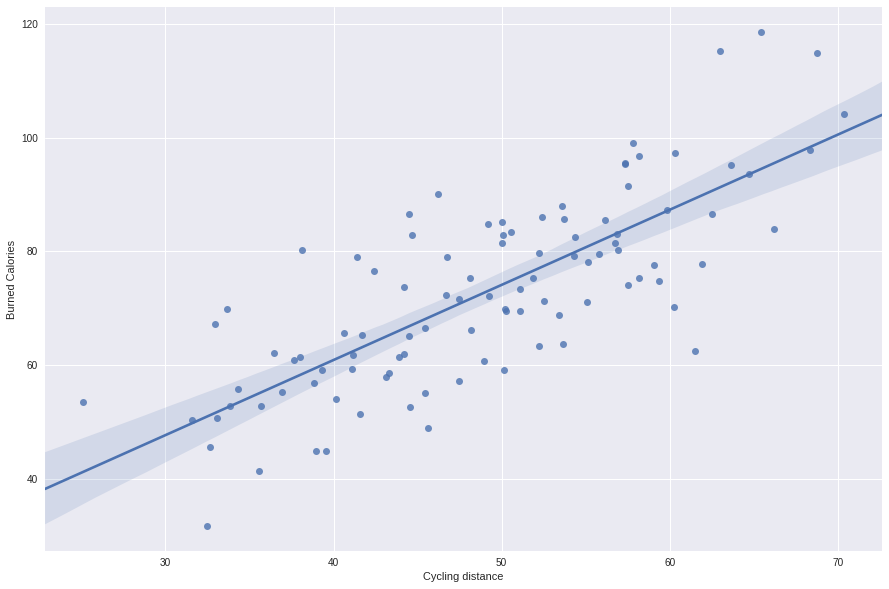

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15, 10))
plt.xlabel('Cycling distance')
plt.ylabel('Burned Calories')
sns.regplot(x = X, y = y)

In [79]:
from sklearn.linear_model import LinearRegression
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(X, y)
print ("Y-intercept", linreg.intercept_[0])
print ("Slope", linreg.coef_[0][0])

Y-intercept 7.99102098227
Slope 1.32243102276


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print (np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE

12.8639742294
